<h1><center> HOUSE PRICE PREDICTION </center></h1>

## Importing required libraries

In [1]:
# Libraries for data manipulation and scientific computing
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Library for stat model
import statsmodels.api as sm

# Library for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [5]:
df=pd.read_csv("D:/semester 3/ml/lab dataset/Delhi house data.csv")

In [6]:
df.head()

,Area of in sq feet,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction(Its a new property or being re-sold),Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [9]:
df.shape

(1259, 11)

In [10]:
df.columns.to_list()

['Area of  in sq feet',
 'BHK',
 'Bathroom',
 'Furnishing',
 'Locality',
 'Parking',
 'Price',
 'Status',
 'Transaction(Its a new property or being re-sold)',
 'Type',
 'Per_Sqft']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Area of  in sq feet                               1259 non-null   float64
 1   BHK                                               1259 non-null   int64  
 2   Bathroom                                          1257 non-null   float64
 3   Furnishing                                        1254 non-null   object 
 4   Locality                                          1259 non-null   object 
 5   Parking                                           1226 non-null   float64
 6   Price                                             1259 non-null   int64  
 7   Status                                            1259 non-null   object 
 8   Transaction(Its a new property or being re-sold)  1259 non-null   object 
 9   Type               

In [14]:
numerical = ["Area of  in sq feet","Bathroom","BHK","Price","Parking","Per_Sqft"]
categorical = ["Furnishing","Locality","Status","Transaction(Its a new property or being re-sold)","Type"]

In [12]:
df.describe()

,Area of in sq feet,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


**Unique values**

In [13]:
for cols in df:
    print(f'{cols}:{df[cols].unique()}')
    print("---------------------------\n")

Area of  in sq feet:[  800.       750.       950.       600.       650.      1300.
  1350.       985.      1100.       870.       630.       660.
   344.4448   550.      1150.       850.       900.       430.556
   914.9315   500.        28.      2160.      1500.      1080.
  1450.       810.      1710.      1650.      1280.      1260.
  1130.      1000.      2925.      1600.      1143.      8000.
   890.      1387.      1050.      1200.       700.      1700.
  1550.      1400.      1900.      1850.      1800.      1620.
  1540.      2300.      1560.       400.      1525.      2200.
  2880.      2700.      1575.      1675.       825.       875.
   450.       100.        75.       270.       444.       729.
  4050.      2400.       405.       666.      1360.      2170.
   720.      1030.       350.       980.       445.       380.
   680.      2500.      2800.       300.      1295.      4688.
  3901.       540.       976.      2900.      5025.      1135.
  2306.     22050.        45.   

In [16]:
##null 
df.isnull().sum()

Area of  in sq feet                                   0
BHK                                                   0
Bathroom                                              2
Furnishing                                            5
Locality                                              0
Parking                                              33
Price                                                 0
Status                                                0
Transaction(Its a new property or being re-sold)      0
Type                                                  5
Per_Sqft                                            241
dtype: int64

In [17]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Bathroom 0.0016  % missing values
Furnishing 0.004  % missing values
Parking 0.0262  % missing values
Type 0.004  % missing values
Per_Sqft 0.1914  % missing values


In [18]:
#duplicate
df.duplicated().sum()

83

In [21]:
#remove duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(1259, 11)
(1176, 11)


In [22]:
discrete_feature=[feature for feature in numerical if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 3


['Bathroom', 'BHK', 'Parking']

In [23]:
df[discrete_feature].head()

,Bathroom,BHK,Parking
0,2.0,3,1.0
1,2.0,2,1.0
2,2.0,2,1.0
3,2.0,2,1.0
4,2.0,2,1.0


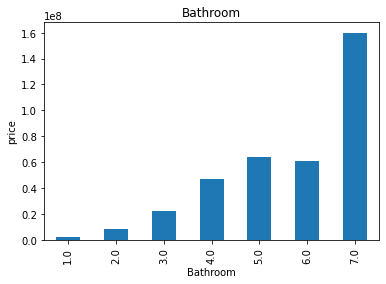

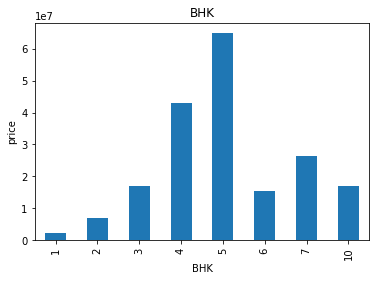

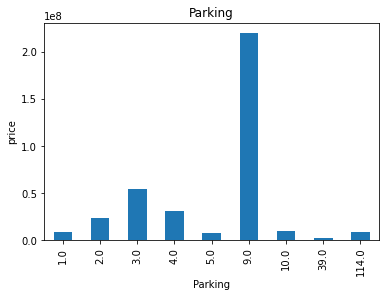

In [26]:
#realtionship between them and Price
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [27]:
#continuous columns
continuous_feature=[feature for feature in numerical if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 3


['Area of  in sq feet', 'Price', 'Per_Sqft']

In [28]:
df[continuous_feature].head()

,Area of in sq feet,Price,Per_Sqft
0,800.0,6500000,NaN
1,750.0,5000000,6667.0
2,950.0,15500000,6667.0
3,600.0,4200000,6667.0
4,650.0,6200000,6667.0


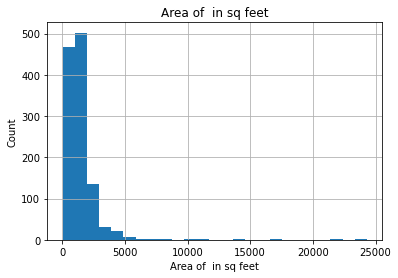

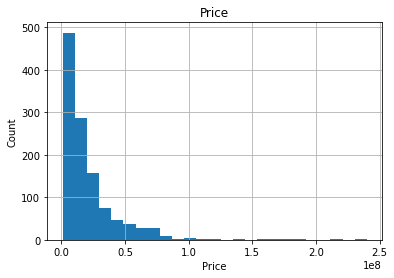

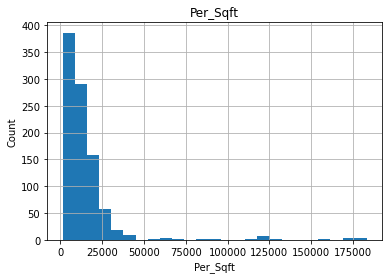

In [29]:
#creating histograms to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [30]:
## skewness
df.skew()

Area of  in sq feet     7.870009
BHK                     0.539503
Bathroom                0.825528
Parking                14.624571
Price                   3.557084
Per_Sqft                5.227985
dtype: float64

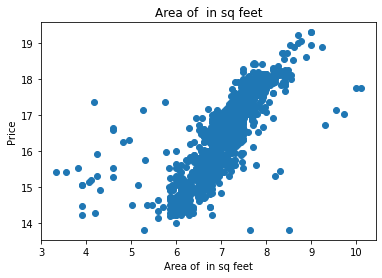

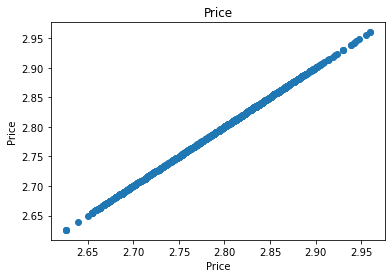

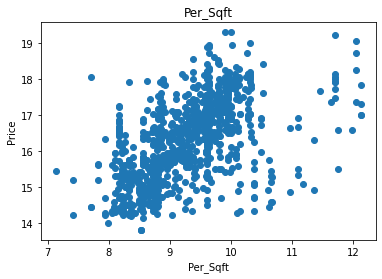

In [32]:
#logarithmic transformation
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['Price']=np.log(data['Price'])
    plt.scatter(data[feature],data['Price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

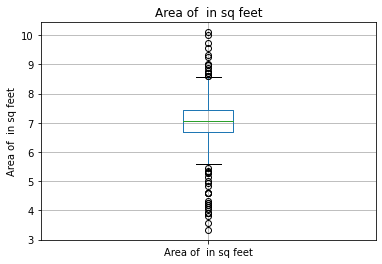

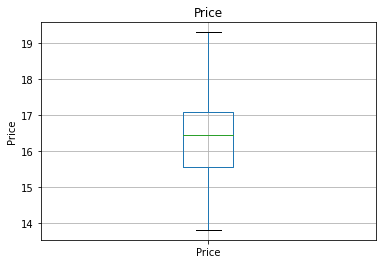

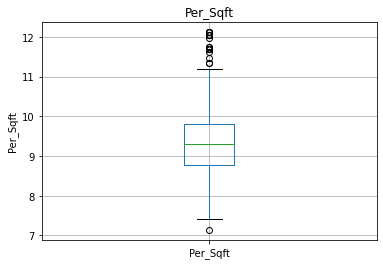

In [33]:
#Outliers
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [35]:
#categorical variables
categorical=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical

['Furnishing',
 'Locality',
 'Status',
 'Transaction(Its a new property or being re-sold)',
 'Type']

In [37]:
df[categorical].head()

,Furnishing,Locality,Status,Transaction(Its a new property or being re-sold),Type
0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment
2,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment
3,Semi-Furnished,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,Ready_to_move,New_Property,Builder_Floor


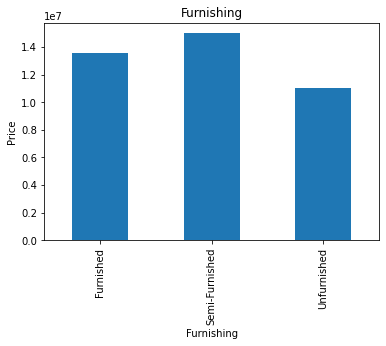

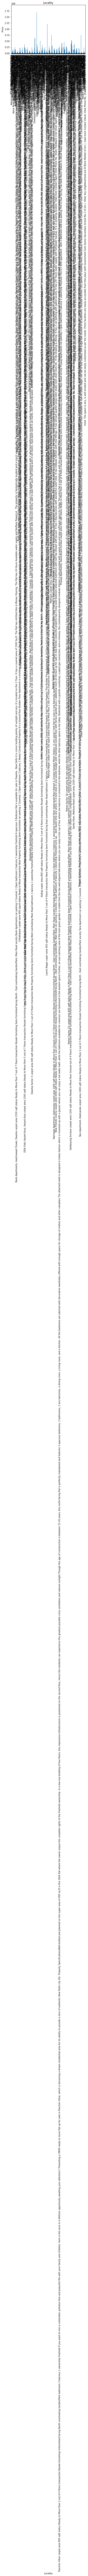

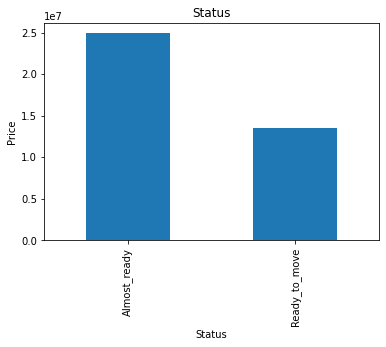

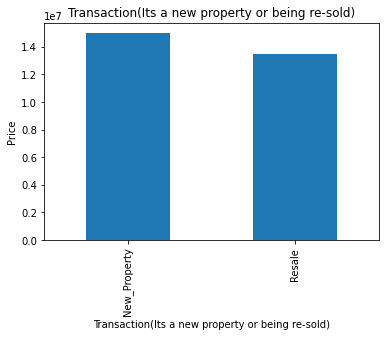

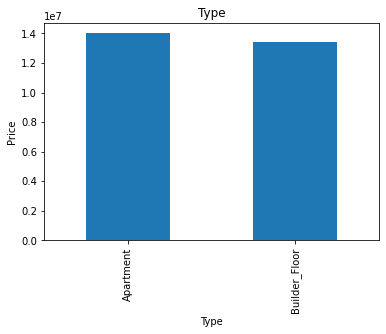

In [40]:
#realtionship between them and Price
for feature in categorical:
    data=df.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [38]:
for feature in categorical:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Furnishing and number of categories are 4
The feature is Locality and number of categories are 365
The feature is Status and number of categories are 2
The feature is Transaction(Its a new property or being re-sold) and number of categories are 2
The feature is Type and number of categories are 3


**Changing categorical to numerical**

In [45]:
df['Furnishing'].replace('Furnished',0,inplace=True)
df['Furnishing'].replace('Semi-Furnished',1,inplace=True)
df['Furnishing'].replace('Unfurnished',2,inplace=True)

In [46]:
df['Status'].replace('Ready_to_move',0,inplace=True)
df['Status'].replace('Almost_ready',1,inplace=True)

In [47]:
df['Transaction(Its a new property or being re-sold)'].replace('Resale',0,inplace=True)
df['Transaction(Its a new property or being re-sold)'].replace('New_Property',1,inplace=True)

In [48]:
df['Type'].replace('Builder_Floor',0,inplace=True)
df['Type'].replace('Apartment',1,inplace=True)

In [49]:
df.head()

,Area of in sq feet,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction(Its a new property or being re-sold),Type,Per_Sqft
0,800.0,3,2.0,1.0,Rohini Sector 25,1.0,6500000,3,1,0.0,NaN
1,750.0,2,2.0,1.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,3,1,1.0,6667.0
2,950.0,2,2.0,0.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,3,0,1.0,6667.0
3,600.0,2,2.0,1.0,Rohini Sector 24,1.0,4200000,3,0,0.0,6667.0
4,650.0,2,2.0,1.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,3,1,0.0,6667.0


In [54]:
df1=df.drop(['Locality'],axis=1)

In [62]:
df1.isnull().sum()

Area of  in sq feet                                   0
BHK                                                   0
Bathroom                                              1
Furnishing                                            5
Parking                                              31
Price                                                 0
Status                                                0
Transaction(Its a new property or being re-sold)      0
Type                                                  5
Per_Sqft                                            227
dtype: int64

In [64]:
df1['Bathroom']=df1['Bathroom'].fillna(df1['Bathroom'].mean())
df1['Furnishing']=df1['Furnishing'].fillna(df1['Furnishing'].mean())
df1['Parking']=df1['Parking'].fillna(df1['Parking'].mean())
df1['Type']=df1['Type'].fillna(df1['Type'].mean())
df1['Per_Sqft']=df1['Per_Sqft'].fillna(df1['Per_Sqft'].mean())

In [65]:
df1.isnull().sum()

Area of  in sq feet                                 0
BHK                                                 0
Bathroom                                            0
Furnishing                                          0
Parking                                             0
Price                                               0
Status                                              0
Transaction(Its a new property or being re-sold)    0
Type                                                0
Per_Sqft                                            0
dtype: int64

**Visualization**

In [86]:
df1.corr(method='spearman')

,Area of in sq feet,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction(Its a new property or being re-sold),Type,Per_Sqft
Area of in sq feet,1.000000,0.766466,0.800452,-0.064227,0.342708,0.851184,0.085794,0.091705,-0.023744,0.333295
BHK,0.766466,1.000000,0.782915,-0.120403,0.257994,0.702768,0.083700,0.146876,-0.121687,0.269079
Bathroom,0.800452,0.782915,1.000000,-0.046529,0.319837,0.793333,0.101242,0.184566,-0.158455,0.333282
Furnishing,-0.064227,-0.120403,-0.046529,1.000000,-0.003534,-0.066089,0.054732,0.023646,-0.014837,-0.044301
Parking,0.342708,0.257994,0.319837,-0.003534,1.000000,0.395264,0.024643,0.036899,0.000124,0.296423
Price,0.851184,0.702768,0.793333,-0.066089,0.395264,1.000000,0.115162,0.111866,-0.054782,0.507154
Status,0.085794,0.083700,0.101242,0.054732,0.024643,0.115162,1.000000,0.241736,0.019073,0.071712
Transaction(Its a new property or being re-sold),0.091705,0.146876,0.184566,0.023646,0.036899,0.111866,0.241736,1.000000,-0.256528,0.021269
Type,-0.023744,-0.121687,-0.158455,-0.014837,0.000124,-0.054782,0.019073,-0.256528,1.000000,-0.064257
Per_Sqft,0.333295,0.269079,0.333282,-0.044301,0.296423,0.507154,0.071712,0.021269,-0.064257,1.000000


<AxesSubplot:>

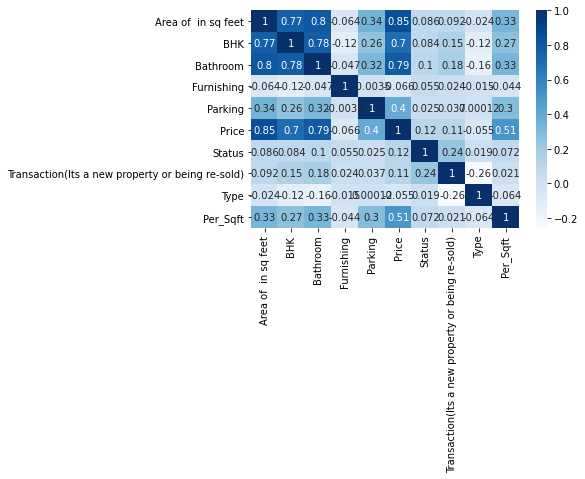

In [88]:
sns.heatmap(df1.corr(method='spearman'), annot=True, cmap='Blues')

<AxesSubplot:xlabel='Per_Sqft'>

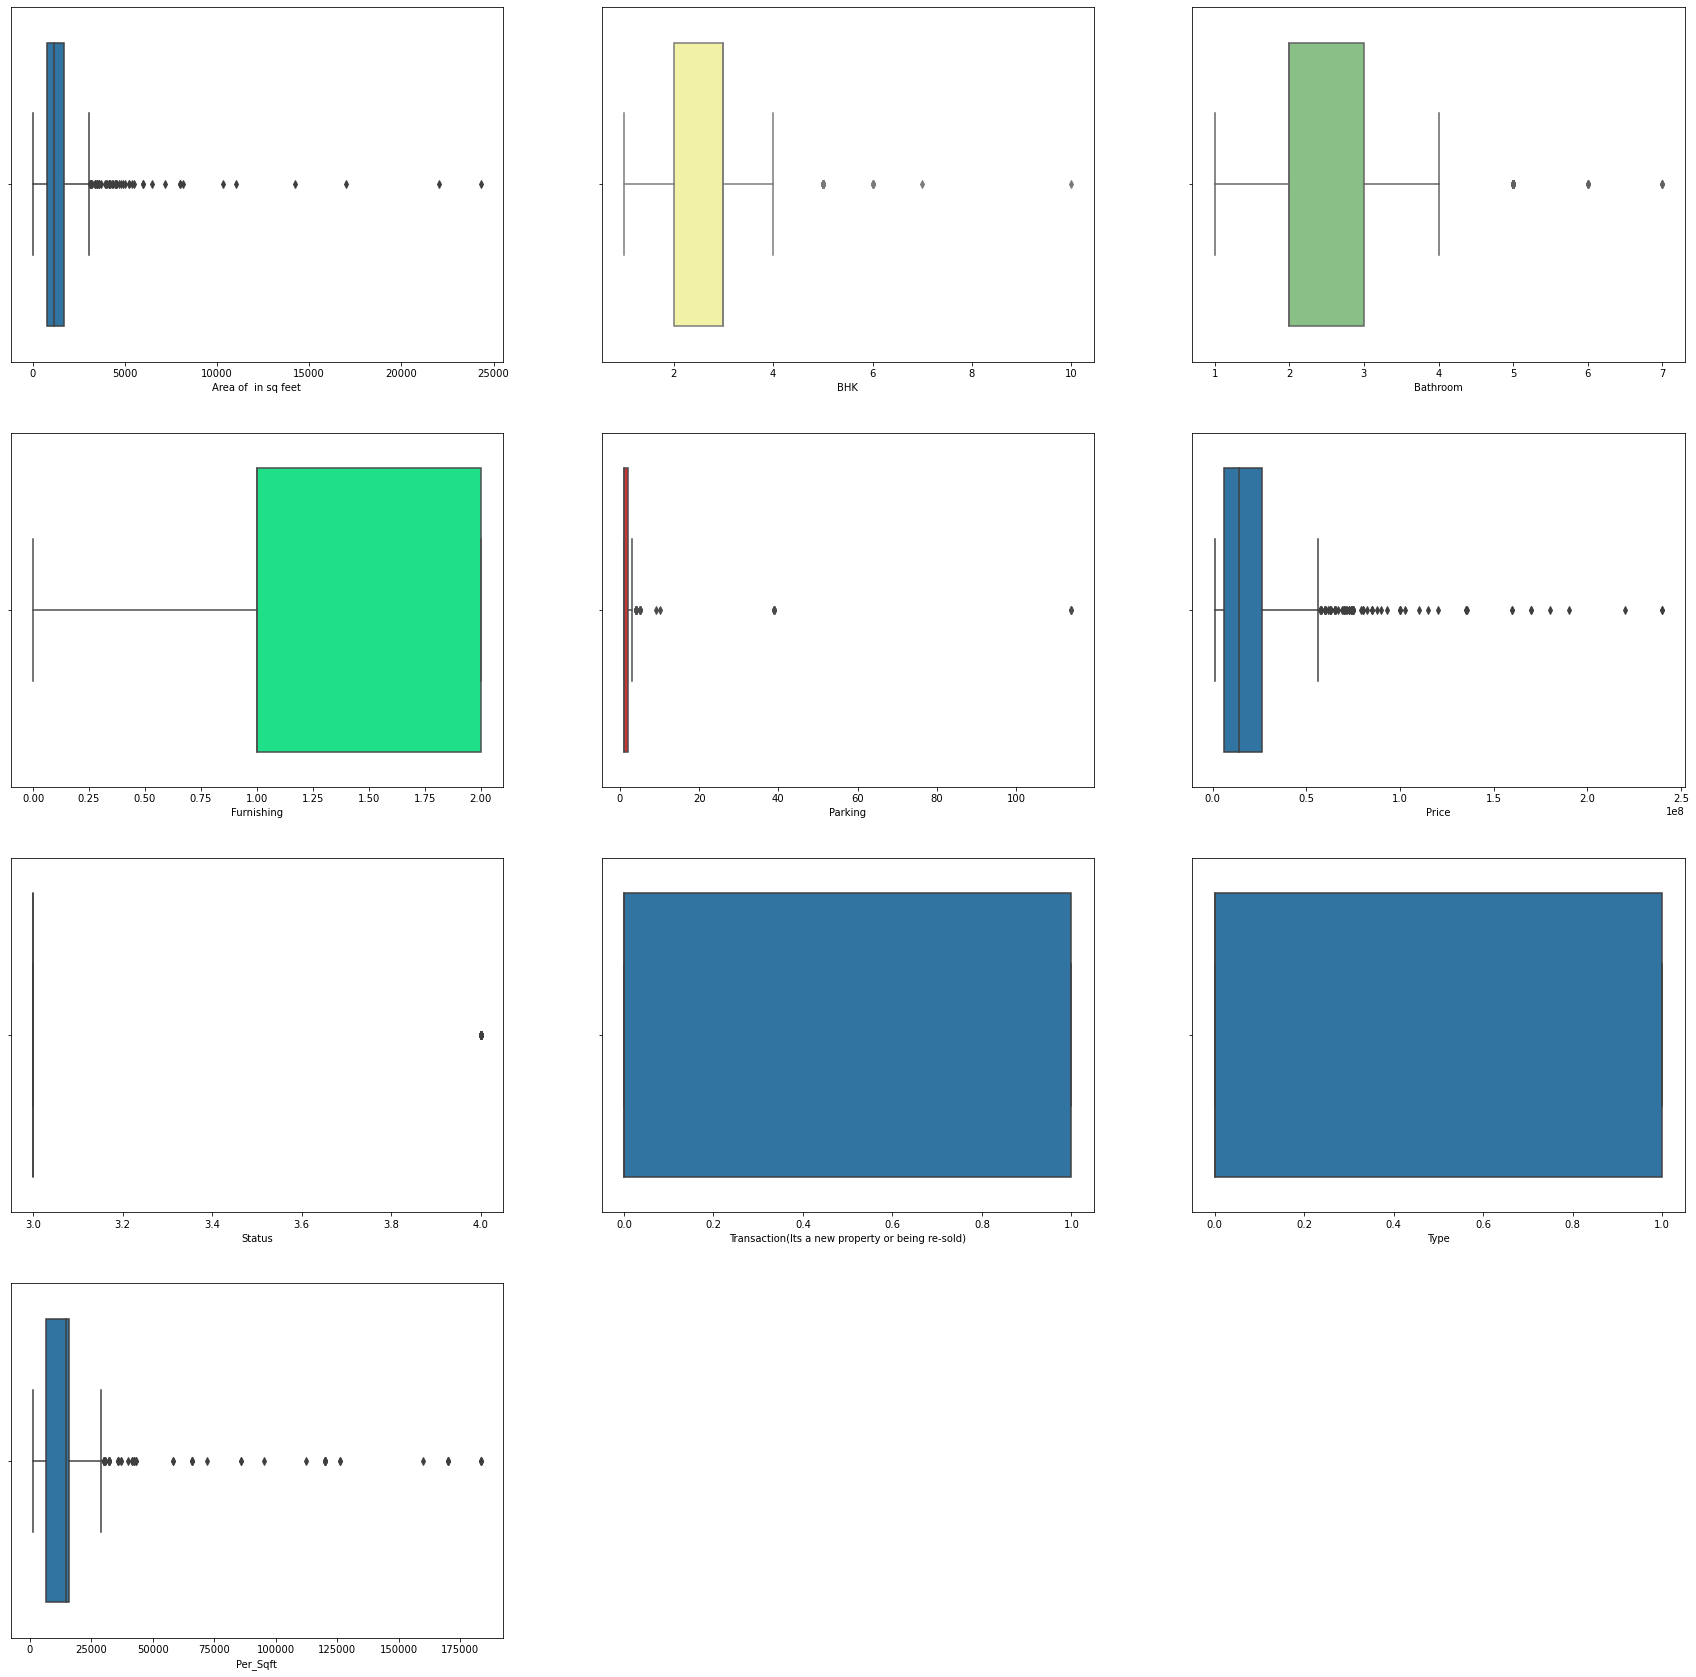

In [94]:
plt.figure(figsize=(30,30))
plt.subplot(4,3,1)
sns.boxplot(x='Area of  in sq feet',data=df1)

plt.subplot(4,3,2)
sns.boxplot(x='BHK',data=df1,palette="Accent_r")

plt.subplot(4,3,3)
sns.boxplot(x='Bathroom',data=df1,palette="Accent")

plt.subplot(4,3,4)
sns.boxplot(x='Furnishing',data=df1,palette="gist_rainbow")

plt.subplot(4,3,5)
sns.boxplot(x='Parking',data=df1,palette="Set1")

plt.subplot(4,3,6)
sns.boxplot(x='Price',data=df1)

plt.subplot(4,3,7)
sns.boxplot(x='Status',data=df1)

plt.subplot(4,3,8)
sns.boxplot(x='Transaction(Its a new property or being re-sold)',data=df1)

plt.subplot(4,3,9)
sns.boxplot(x='Type',data=df1)

plt.subplot(4,3,10)
sns.boxplot(x='Per_Sqft',data=df1)

**model**

In [66]:
data=df1

In [67]:
X=data.drop(['Price'],axis=1)
Y=data[['Price']]

In [68]:
#linear regression
#spliting data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

linear_reg = LinearRegression()

In [69]:
#model
model=linear_reg.fit(X_train,Y_train)

In [70]:
pred=model.predict(X_test)
pred

array([[ 1.29202727e+07],
       [ 1.03610880e+07],
       [-4.51478325e+06],
       [ 1.06670034e+07],
       [-5.37161274e+06],
       [ 5.88348082e+07],
       [ 2.54416238e+07],
       [-6.52232650e+06],
       [ 9.55691583e+06],
       [ 7.21969575e+07],
       [ 5.42725785e+06],
       [-4.68712240e+06],
       [ 2.38185991e+07],
       [ 9.97179308e+06],
       [ 1.21786478e+07],
       [ 6.42202797e+06],
       [ 1.21640872e+07],
       [ 3.03212581e+07],
       [ 8.14322971e+06],
       [ 1.16341344e+07],
       [ 1.31496737e+07],
       [ 7.54144662e+06],
       [ 3.70861413e+07],
       [ 1.15818928e+07],
       [ 3.42637776e+07],
       [-5.81807136e+06],
       [ 1.07839211e+07],
       [ 7.43101687e+07],
       [ 7.60867921e+07],
       [ 1.07105376e+07],
       [ 1.19250825e+07],
       [ 2.16439197e+07],
       [ 5.80278358e+07],
       [ 8.38756435e+06],
       [ 1.20388543e+06],
       [ 2.53884572e+07],
       [ 1.04638623e+07],
       [ 6.65688774e+06],
       [ 2.6

In [71]:
#r2_score
from sklearn.metrics import r2_score

r2_score(Y_test,pred)

0.6037347833287946

In [72]:
#mean squared error
from sklearn.metrics import mean_squared_error
from math import *

sqrt(mean_squared_error(pred,Y_test))

17223211.177992564

In [73]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly=poly.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y, test_size=0.2)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [76]:
#prediction
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_y_predicted

array([[ 9.00342607e+06],
       [ 4.59922569e+07],
       [ 1.64416963e+07],
       [ 3.66852372e+06],
       [ 2.17981233e+07],
       [-1.58801923e+07],
       [ 4.10517405e+07],
       [ 2.63506594e+07],
       [ 5.06521848e+06],
       [ 3.26943570e+07],
       [ 2.02788140e+07],
       [ 7.53175955e+06],
       [ 1.09835626e+07],
       [ 3.03824185e+07],
       [ 2.66391702e+07],
       [ 1.66880413e+06],
       [ 8.91162242e+06],
       [ 1.25760596e+07],
       [ 1.29675319e+07],
       [ 4.72103251e+07],
       [ 1.77440313e+07],
       [ 1.07816526e+07],
       [ 1.75060653e+07],
       [ 3.23848188e+07],
       [ 5.78468403e+07],
       [-3.44152289e+06],
       [ 4.70801448e+06],
       [ 2.82583304e+07],
       [ 7.98651875e+06],
       [ 1.08538005e+07],
       [ 1.78352508e+07],
       [ 1.32470690e+07],
       [ 6.72642269e+06],
       [ 9.04063207e+06],
       [ 1.75941209e+07],
       [ 8.92212810e+06],
       [ 6.28950640e+06],
       [ 6.18135177e+06],
       [ 1.0

In [77]:
print(y_test)

         Price
312    4100000
669   52500000
633   15000000
952    4300000
1087   5800000
...        ...
125   11500000
1170   3800000
452   25000000
10     6200000
345   26500000

[236 rows x 1 columns]


In [78]:
r2_score(y_test,poly_reg_y_predicted)

0.7185507463351652

In [79]:
sqrt(mean_squared_error(poly_reg_y_predicted,y_test))

13809636.389663715

In [80]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [81]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train,Y_train)
#print(dtr.score(X, Y))

In [82]:
#prediction
pred1 = dtr.predict(X_test)
pred1

array([1.760e+07, 7.000e+07, 6.500e+07, 6.890e+07, 1.500e+06, 5.600e+06,
       1.335e+07, 4.800e+06, 6.500e+06, 2.650e+07, 1.350e+07, 1.070e+07,
       5.890e+06, 1.600e+08, 9.000e+06, 8.400e+06, 4.370e+06, 1.150e+07,
       1.600e+06, 1.335e+07, 5.100e+07, 1.250e+07, 6.500e+06, 8.500e+06,
       1.550e+07, 7.500e+06, 9.000e+06, 5.500e+06, 9.000e+06, 1.380e+07,
       2.350e+06, 2.150e+07, 1.500e+06, 1.250e+07, 4.320e+07, 2.300e+07,
       2.900e+06, 9.300e+06, 1.700e+07, 2.350e+06, 3.000e+07, 6.400e+06,
       2.600e+07, 3.000e+06, 2.500e+06, 4.700e+06, 7.300e+06, 2.200e+07,
       4.200e+06, 1.800e+07, 1.300e+07, 2.400e+06, 5.000e+06, 4.350e+07,
       1.580e+07, 2.600e+06, 1.250e+07, 2.350e+06, 3.650e+07, 6.500e+06,
       2.150e+07, 2.200e+07, 9.000e+07, 1.000e+07, 3.100e+07, 4.750e+07,
       5.500e+07, 9.000e+07, 4.600e+06, 2.350e+07, 1.500e+07, 1.850e+07,
       1.350e+08, 2.000e+06, 6.300e+07, 2.400e+06, 5.890e+06, 1.200e+07,
       7.000e+06, 2.500e+06, 1.070e+07, 2.750e+07, 

In [83]:
print(Y_test)

         Price
633   15000000
1221  65000000
922   62500000
1254  55000000
882    1600000
...        ...
1104  12500000
878    2000000
108   20000000
568   31000000
41    12500000

[236 rows x 1 columns]


In [84]:
from sklearn.metrics import r2_score

r2_score(Y_test,pred1)

0.6852601930519026

In [85]:
#mean squared error
from sklearn.metrics import mean_squared_error
from math import *

sqrt(mean_squared_error(pred1,Y_test))

11584451.20606767